ARIMA
Método estatístico que utiliza autoregressão e médias móveis para previsão de séries temporais. Um modelo linear é construído incluindo um número especificado de termos e os dados são preparados por um nível de diferenciação afim de tornar este estacionário.

Podemos usar um valor 0 para desligar um parâmetro, dessa forma, aquela função em questão não será feita, por exemplo, se no parâmetro d definirmos 0 não será realizada uma diferenciação nos dados. Neste exemplo teríamos um modelo ARMA.

AR: Autoregression : Um modelo que usa a relação dependende entre uma observação e alguns lags.

I: Integrated : Uso de diferenciação nas observações brutas, exemplo: subtração do valor de uma observação com sua observação anterior. O objetivo é transformar a série temporal em estacionária.

MA: Moving Average : Um modelo que usa a dependência entre a observação e o erro residual a partir de um modelo de média móvel aplicado a lags.

   residual error = expected − predicted

Isso é diferente de Moving Average Smoothing.
Erros residuais contém estruturas temporais que podem ser modeladas.
Existem sinais complexos nos erros residuais.
Um modelo que prever o erro residual pode ser usado para ajustar os próximos erros e melhorar um modelo que aprende com o histórico.

O modelo arima contém alguns parâmetros

**ARIMA (p,d,q)**
p: O número de lags que devem ser incluídos no modelo.
d: O número de vezes que as observações serão diferenciadas.
q: O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

In [10]:
import pandas as pd
# elimina os warnings das bibliotecas
import warnings
warnings.filterwarnings("ignore")

In [11]:
dados = pd.read_csv('vc_st_dia_fb.csv', sep=';', index_col='data')
dados.head(3)

,acessos
data,
01/06/2022,74
02/06/2022,129
03/06/2022,189


In [12]:
dados.tail(3)

,acessos
data,
26/02/2023,253
27/02/2023,233
28/02/2023,244


In [14]:
dados.index = pd.to_datetime(dados.index, format='%d/%m/%Y')

In [15]:
dados_ts = dados.asfreq('D')

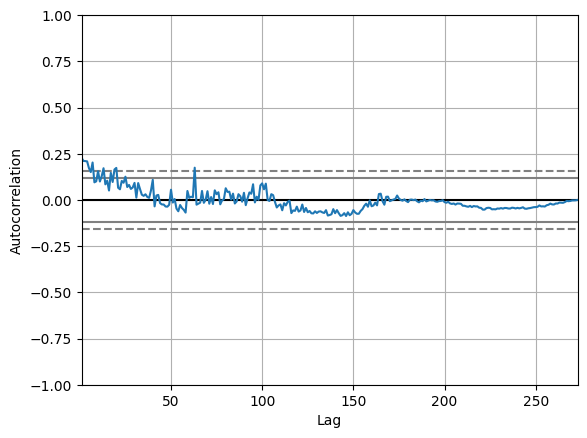

In [16]:
# autocorrelation plot 
autocorrelation_plot(dados)
pyplot.show()

In [17]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

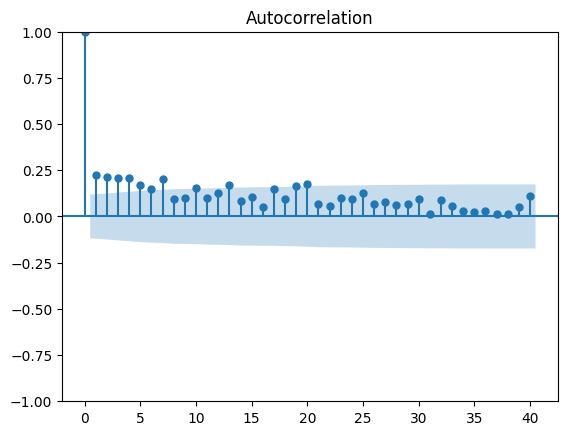

In [18]:
plot_acf(dados, lags=40)
pyplot.show()

Modelo ARIMA para análise de dados

In [23]:
# fit model
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

In [24]:
# ARIMA(p,d,q)
model = ARIMA(dados, order=(6,1,0))

In [25]:
model_fit = model.fit()

In [26]:
# summary 
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                acessos   No. Observations:                  273
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -1654.930
Date:                Sun, 30 Jul 2023   AIC                           3323.861
Time:                        18:36:11   BIC                           3349.101
Sample:                    06-01-2022   HQIC                          3333.994
                         - 02-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8149      0.027    -30.371      0.000      -0.868      -0.762
ar.L2         -0.6617      0.039    -16.830      0.000      -0.739      -0.585
ar.L3         -0.5168      0.046    -11.231      0.0

In [27]:
# plot residuais
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

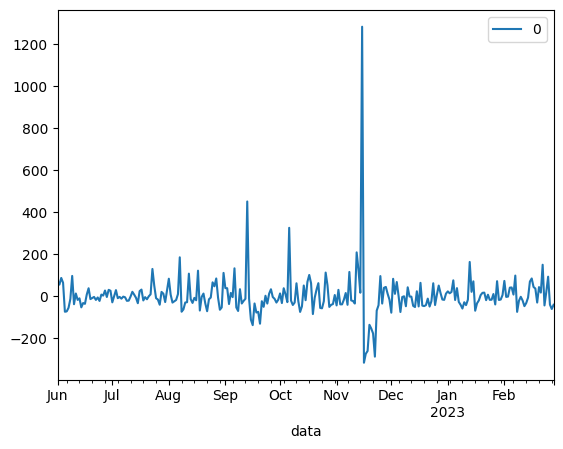

In [28]:
residuals.plot()
pyplot.show()

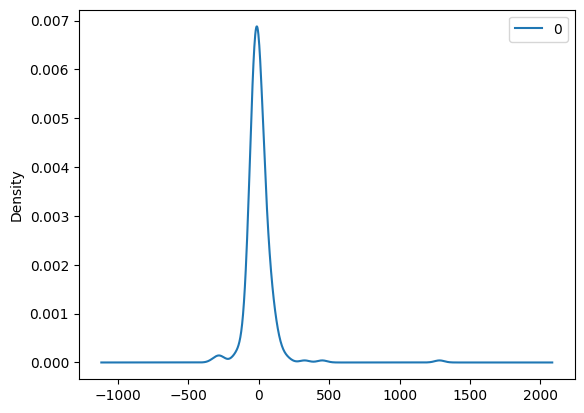

In [29]:
# gráficos de densidade dos residuais
residuals.plot(kind='kde')
pyplot.show()

In [30]:
# estatística descritiva dos residuos
print(residuals.describe())

                 0
count   273.000000
mean      2.680929
std     106.131150
min    -316.322082
25%     -34.490624
50%      -8.352043
75%      26.540328
max    1283.831993


Prevendo dados com ARIMA utilizando Walk Forward

Separando os dados de treino e teste

In [32]:
# a variável X recebe os dados da série
X = dados.values
X = X.astype('float32')

In [33]:
# Separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.50)

In [34]:
# Separa dados de treino e teste
train = X[0:size]
test =  X[size:]

In [35]:
# cria a variável history
history = [x for x in train]

In [36]:
# cria lista de previsões
predictions = list()

In [37]:
# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list() 
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [40]:
# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)
  
  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(0,0,1))
  
  # treina o modelo ARIMA
  model_fit = model.fit()
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

Valor predito=175.935, Valor esperado=143
Valor predito=126.561, Valor esperado=227
Valor predito=111.134, Valor esperado=286
Valor predito=472.180, Valor esperado=255
Valor predito=131.917, Valor esperado=114
Valor predito=135.601, Valor esperado=189
Valor predito=150.665, Valor esperado=237
Valor predito=261.218, Valor esperado=265
Valor predito=168.667, Valor esperado=166
Valor predito=108.749, Valor esperado=161
Valor predito=169.927, Valor esperado=180
Valor predito=217.068, Valor esperado=296
Valor predito=162.536, Valor esperado=265
Valor predito=251.351, Valor esperado=176
Valor predito=283.883, Valor esperado=180
Valor predito=247.197, Valor esperado=168
Valor predito=108.780, Valor esperado=205
Valor predito=211.381, Valor esperado=158
Valor predito=236.653, Valor esperado=236
Valor predito=272.311, Valor esperado=165
Valor predito=156.925, Valor esperado=146
Valor predito=165.880, Valor esperado=162
Valor predito=185.854, Valor esperado=191
Valor predito=303.226, Valor esper

In [41]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 183.144


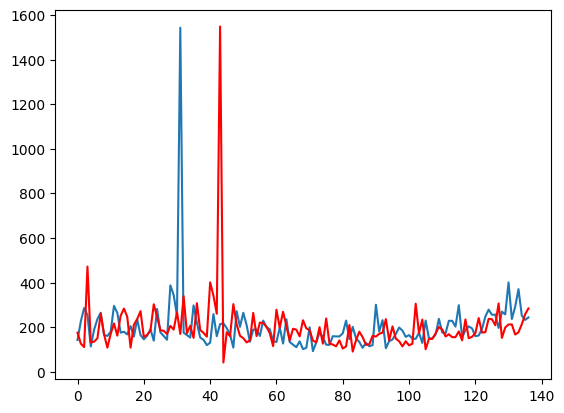

In [42]:
# plot forecasts against actual outcomes 
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Analisando Resíduos
  Erro Residual = Valor esperado − Valor Predito

Erros residuais são erros em previsões de séries temporais.
Uma análise dos erros pode sugerir melhoras no modelo.
Tendências.
Sazonalidades.

In [43]:
# erros residuais 
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [44]:
# converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

In [45]:
# imprime as 5 primeiras linhas
residuals.head()

,0
0,-32.935043
1,100.439362
2,174.866394
3,-217.180420
4,-17.916672


In [46]:
# estatística descritiva
residuals.describe()

,0
count,137.000000
mean,2.483069
std,183.799225
min,-1334.540649
25%,-46.267715
50%,3.782410
75%,48.157700
max,1372.901978


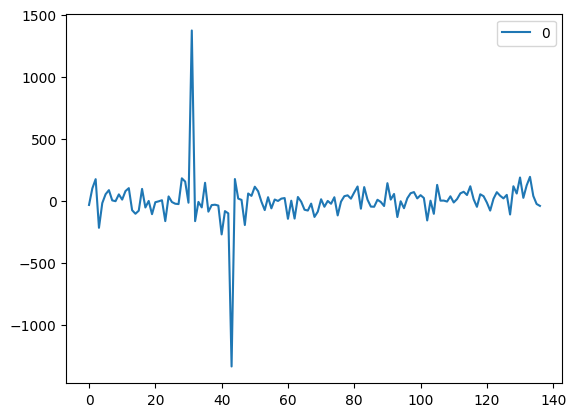

In [47]:
# plot residuals
residuals.plot()
pyplot.show()

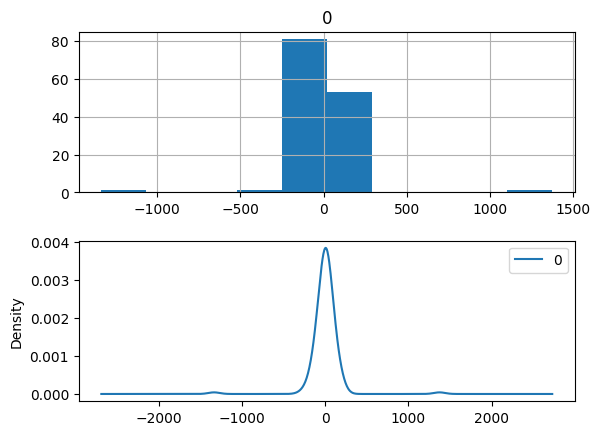

In [48]:
# plots histograma
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())

pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [49]:
# importa os pacotes de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

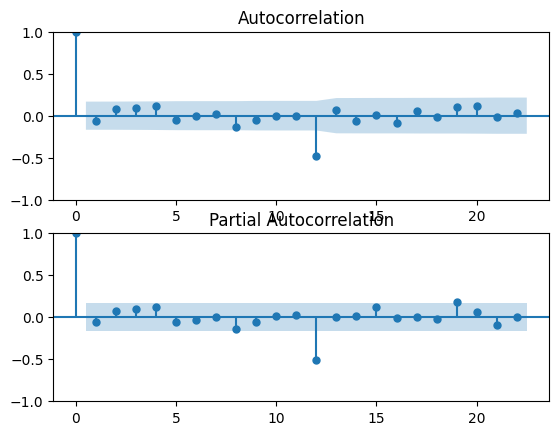

In [50]:
# plots de autocorrelação
pyplot.figure() 
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

Conclusão: